In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [178]:
# 1. Załadowanie zbioru danych irysów
iris = datasets.load_iris()
X = iris.data[:, 1:]  # Używamy wszystkich cech oprócz "sepal length"
y = iris.data[:, 0]   # Długość działki kielicha ("sepal length") jako wartość docelowa
flower_class = iris.target.reshape(-1, 1)  # Klasa kwiatu (Setosa, Versicolor, Virginica)


In [179]:
# 2. Wstępne przetwarzanie danych

encoder = OneHotEncoder(sparse_output=False)
flower_encoded = encoder.fit_transform(flower_class)

# 3. Połączenie cech numerycznych i zakodowanej klasy kwiatu
X_combined = np.hstack((X, flower_encoded))

# Normalizacja cech (standaryzacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, shuffle=True)

In [181]:
# 3. Budowa modelu sieci neuronowej do regresji
model = Sequential([
    Dense(12, input_dim=6, activation='elu'),      # Pierwsza warstwa ukryta z 16 neuronami
    BatchNormalization(),                           # Normalizacja wsadowa
    # Dropout(0.5),                                   # Dropout z 20% prawdopodobieństwem                              # Dropout z 30% prawdopodobieństwem
    
    Dense(6, activation='leaky_relu'),                   # Trzecia warstwa ukryta z 16 neuronami
    BatchNormalization(),                           # Normalizacja wsadowa
    # Dropout(0.2),                                   # Dropout z 20% prawdopodobieństwem
    
    Dense(1)                                        # Warstwa wyjściowa do regresji
])

/home/aleksander.kolodziej@A4BEE.ad/Desktop/lab--AI-ML--szkolenie--olson/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
# 4. Kompilacja modelu
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [183]:
# Wyświetlenie struktury modelu
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 6)              │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 205 (820.00 B)

 Non-trainable params: 36 (144.00 B)

In [184]:
# 5. Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=30, 
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/500


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 39.6916 - mean_absolute_error: 5.8804 - val_loss: 35.7950 - val_mean_absolute_error: 5.8702
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.1973 - mean_absolute_error: 5.7991 - val_loss: 35.6656 - val_mean_absolute_error: 5.8717
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.0429 - mean_absolute_error: 5.8334 - val_loss: 35.4577 - val_mean_absolute_error: 5.8634
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 36.5991 - mean_absolute_error: 5.7702 - val_loss: 35.1689 - val_mean_absolute_error: 5.8458
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.6958 - mean_absolute_error: 5.7453 - val_loss: 34.8869 - val_mean_absolute_error: 5.8276
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 35.9913 - mean_absolute_error: 5.8342 - val_loss: 34.6417 - val_mean_absolute_error: 5.8118
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35.6451 - mean_absolute_error: 5.8341 - val_loss: 34.4225 - 

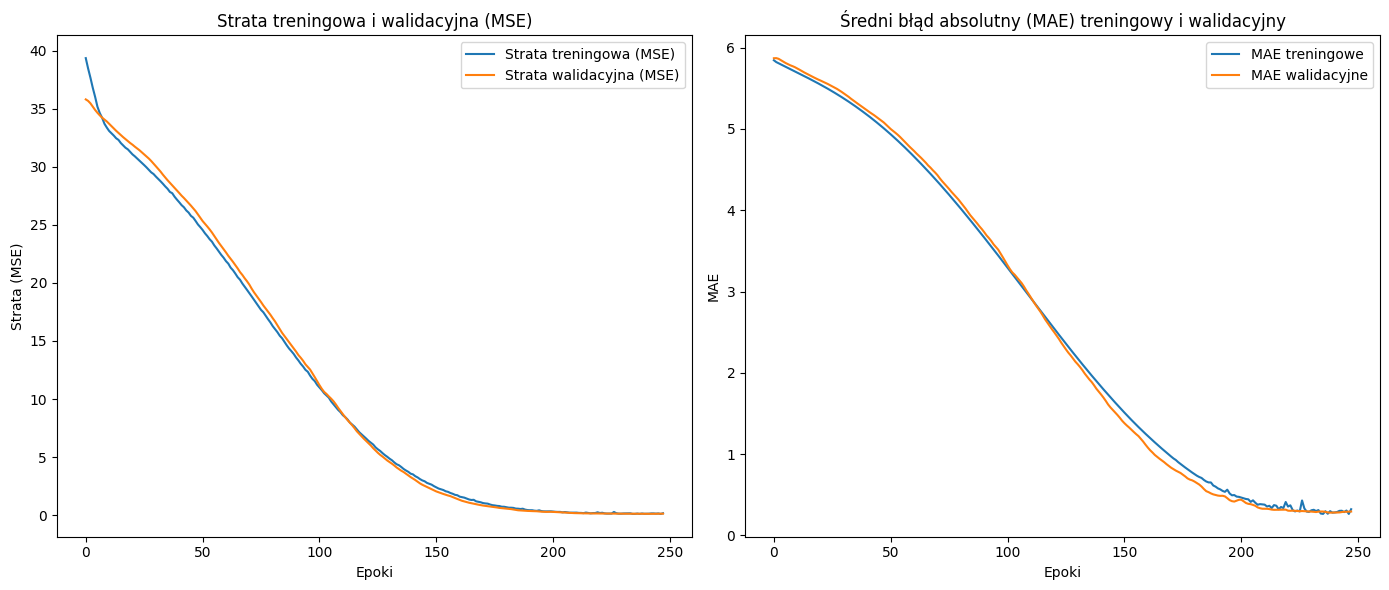

In [185]:
# 6. Wizualizacja wyników

# Wykres strat treningowych i walidacyjnych
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa (MSE)')
plt.plot(history.history['val_loss'], label='Strata walidacyjna (MSE)')
plt.xlabel('Epoki')
plt.ylabel('Strata (MSE)')
plt.legend()
plt.title('Strata treningowa i walidacyjna (MSE)')

# Wykres MAE (Mean Absolute Error) treningowej i walidacyjnej
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='MAE treningowe')
plt.plot(history.history['val_mean_absolute_error'], label='MAE walidacyjne')
plt.xlabel('Epoki')
plt.ylabel('MAE')
plt.legend()
plt.title('Średni błąd absolutny (MAE) treningowy i walidacyjny')

plt.tight_layout()
plt.show()

In [186]:
# 7. Ocena modelu na zbiorze testowym
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Strata modelu na zbiorze testowym (MSE): {test_loss:.4f}')
print(f'Średni błąd absolutny (MAE) na zbiorze testowym: {test_mae:.4f}')

Strata modelu na zbiorze testowym (MSE): 0.1152
Średni błąd absolutny (MAE) na zbiorze testowym: 0.2829


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RMSE: 0.3394
MAE: 0.2829


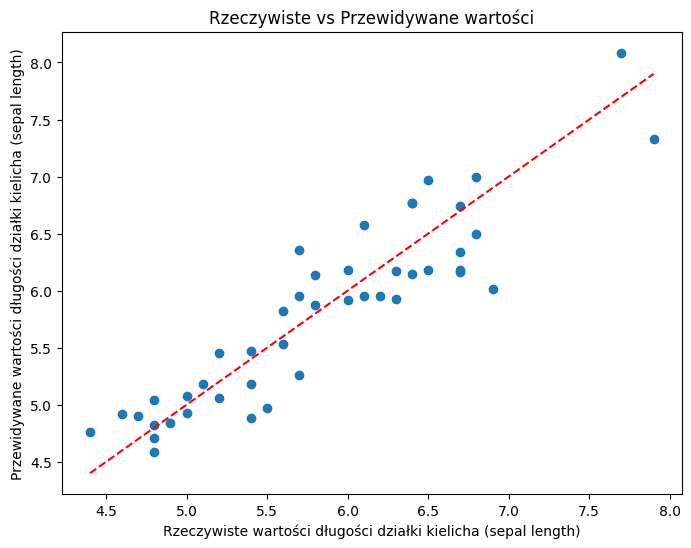

In [187]:
# 8. Przewidywanie i ocena
y_pred = model.predict(X_test)

# Obliczenie RMSE (Root Mean Squared Error) i MAE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

# Wizualizacja przewidywań w porównaniu z rzeczywistymi wartościami
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Rzeczywiste wartości długości działki kielicha (sepal length)')
plt.ylabel('Przewidywane wartości długości działki kielicha (sepal length)')
plt.title('Rzeczywiste vs Przewidywane wartości')
plt.show()